Nama : Arul Insan <br>
NIM : 211351028<br>
Kelas : IF Pagi B

# import Dataset

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"arulinsan","key":"55a79bed4e334eae7913fb82e022c5e1"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d tejashvi14/travel-insurance-prediction-data

  0% 0.00/13.0k [00:00<?, ?B/s]
100% 13.0k/13.0k [00:00<00:00, 11.4MB/s]


In [4]:
!mkdir travel-insurance-prediction-data
!unzip travel-insurance-prediction-data.zip -d travel-insurance-prediction-data
!ls travel-insurance-prediction-data

Archive:  travel-insurance-prediction-data.zip
  inflating: travel-insurance-prediction-data/TravelInsurancePrediction.csv  
TravelInsurancePrediction.csv


# import library yang digunakan

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import plot_tree

# Data Discovery

In [6]:
df = pd.read_csv ("travel-insurance-prediction-data/TravelInsurancePrediction.csv")

In [7]:
df.info() # Melihat Type data pada setiap kolom

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [8]:
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [9]:
df.isnull().sum() # Melihat apakah data ada yang null(Kosong) atau tidak

Unnamed: 0             0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [10]:
df.describe()

,Unnamed: 0,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,993.000000,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,573.741812,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,0.000000,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,496.500000,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,993.000000,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,1489.500000,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,1986.000000,35.000000,1.800000e+06,9.000000,1.000000,1.000000


# EDA (minimal 5)

[Text(0.5, 1.0, 'Persentase Pelanggan Membeli Asuransi Perjalanan Atau Tidak ')]

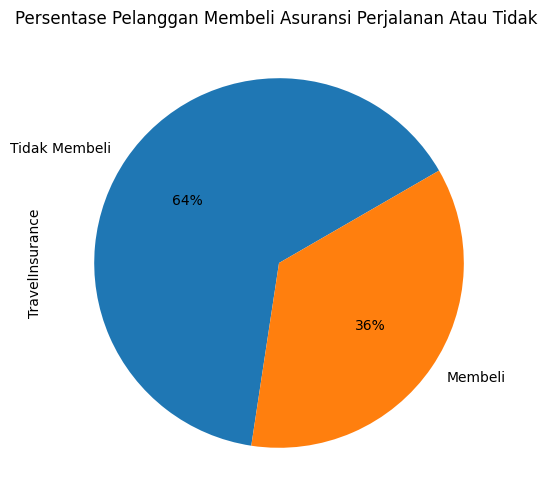

In [11]:
fig, ax1 = plt.subplots(nrows=1, sharey=False, figsize=(14,6))

#Pie Plot
ax1 = df['TravelInsurance'].value_counts().plot.pie( x ="Tidak Membeli" ,y ='Membeli',
                   autopct = "%1.0f%%",labels=["Tidak Membeli","Membeli"], startangle = 30,ax=ax1)
ax1.set(title = "Persentase Pelanggan Membeli Asuransi Perjalanan Atau Tidak ")

In [12]:
df=df
figure=px.histogram(df, x="Age", color= "TravelInsurance", title= "Analisis Faktor banyaknya pembelian asuransi perjalanan berdasarkan : Usia")
figure.update_layout(
    autosize=False,
    width=1200,
    height=900
)
figure.show()

In [13]:
df=df
figure=px.histogram(df, x="Employment Type", color= "TravelInsurance", title= "Analisis Faktor banyaknya pembelian asuransi perjalanan berdasarkan : Tipe Ketenagakerjaan")
figure.update_layout(
    autosize=False,
    width=900,
    height=900
)
figure.show()

In [14]:
df=df
figure=px.histogram(df, x="AnnualIncome", color= "TravelInsurance", title= "Analisis Faktor banyaknya pembelian asuransi perjalanan berdasarkan : Pendapatan tahunan")
figure.show()

In [15]:
df=df
figure=px.histogram(df, x="FamilyMembers", color= "TravelInsurance", title= "Analisis Faktor banyaknya pembelian asuransi perjalanan berdasarkan : Tipe Ketenagakerjaan")
figure.update_layout(
    autosize=False,
    width=1000,
    height=1000
)
figure.show()

# Data Preprocessing

### Mengkategorikan Data dan Transformasi Data

In [16]:
df.drop(columns = ['Unnamed: 0'], inplace = True) # Menghapus data tidak perlu

In [17]:
catgcols = []
select_columns = df.columns [:8]
for col in select_columns:
        catgcols.append(col)

for col in select_columns:
    df[col].fillna(df[col].mode()[0], inplace= True) #Mengkelompokan data yang untuk visualisasi

In [18]:
catgcols

['Age',
 'Employment Type',
 'GraduateOrNot',
 'AnnualIncome',
 'FamilyMembers',
 'ChronicDiseases',
 'FrequentFlyer',
 'EverTravelledAbroad']

In [19]:
ind_col = [col for col in df.columns if col != 'TravelInsurance']

In [20]:
bins =np.linspace(min(df["AnnualIncome"]), max(df["AnnualIncome"]), 4) #Mengkategorikan Kolom Annual Income

In [21]:
print(bins)

[ 300000.  800000. 1300000. 1800000.]


In [22]:
kategori = ['Pendapatan Rendah', 'Pendapatan Sedang', 'Pendapatan Tinggi'] # Di bagi menjadi 3

In [23]:
df["AnnualIncome"] = pd.cut(df["AnnualIncome"], bins, labels= kategori, include_lowest= True)

In [24]:
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,Pendapatan Rendah,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,Pendapatan Sedang,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,Pendapatan Rendah,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,Pendapatan Rendah,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,Pendapatan Rendah,8,1,Yes,No,0


In [25]:
df["AnnualIncome"].replace(['Pendapatan Rendah','Pendapatan Sedang', 'Pendapatan Tinggi'],[1,2,3],inplace=True)
df["AnnualIncome"] = df["AnnualIncome"].astype('int64')

In [26]:
df["AnnualIncome"].value_counts()

1    888
2    750
3    349
Name: AnnualIncome, dtype: int64

In [27]:
# Transformasi Data Dari Object ke Int64
df.replace({'Employment Type' : {"Government Sector" : 1}}, inplace = True)
df.replace({'Employment Type' : {"Private Sector/Self Employed" : 0}}, inplace = True)

df.replace({'GraduateOrNot' : {"Yes" : 1}}, inplace = True)
df.replace({'GraduateOrNot' : {"No" : 0}}, inplace = True)

df.replace({'FrequentFlyer' : {"Yes" : 1}}, inplace = True)
df.replace({'FrequentFlyer' : {"No" : 0}}, inplace = True)

df.replace({'EverTravelledAbroad' : {"Yes" : 1}}, inplace = True)
df.replace({'EverTravelledAbroad' : {"No" : 0}}, inplace = True)

# Data Setelah Processing

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Age                  1987 non-null   int64
 1   Employment Type      1987 non-null   int64
 2   GraduateOrNot        1987 non-null   int64
 3   AnnualIncome         1987 non-null   int64
 4   FamilyMembers        1987 non-null   int64
 5   ChronicDiseases      1987 non-null   int64
 6   FrequentFlyer        1987 non-null   int64
 7   EverTravelledAbroad  1987 non-null   int64
 8   TravelInsurance      1987 non-null   int64
dtypes: int64(9)
memory usage: 139.8 KB


In [29]:
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,1,1,1,6,1,0,0,0
1,31,0,1,2,7,0,0,0,0
2,34,0,1,1,4,1,0,0,1
3,28,0,1,1,3,1,0,0,0
4,28,0,1,1,8,1,1,0,0


# modeling

In [30]:
x = df.drop(columns=['TravelInsurance'],axis=1)
y = df['TravelInsurance']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=40)
print(f"'X' shape: {x_train.shape}")
print(f"'y' shape: {y_test.shape}")

'X' shape: (1589, 8)
'y' shape: (398,)


In [31]:
dtc = DecisionTreeClassifier(
    ccp_alpha=0.0, class_weight=None, criterion='entropy',
    max_depth=4, max_features=None, max_leaf_nodes= None,
    min_impurity_decrease= 0.0, min_samples_leaf= 1,
    min_samples_split= 2, min_weight_fraction_leaf= 0.0,
    random_state= 42, splitter= 'best'
)


model = dtc.fit(x_train,y_train)
dtc_acc = accuracy_score(y_test, dtc.predict(x_test))

print(f"Akurasi Data Training = {accuracy_score(y_train, dtc.predict(x_train))}")
print(f"Akurasi Data Testing = {dtc_acc} \n")

print(f"Confusion Matrix : \n{confusion_matrix(y_test, dtc.predict(x_test))}\n")
confusion = confusion_matrix(y_test, dtc.predict(x_test))
tn, fp, fn, tp= confusion.ravel()
print(f"Classification Report : \n {classification_report(y_test, dtc.predict(x_test))}")

Akurasi Data Training = 0.8376337319068596
Akurasi Data Testing = 0.8241206030150754 

Confusion Matrix : 
[[238   9]
 [ 61  90]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.80      0.96      0.87       247
           1       0.91      0.60      0.72       151

    accuracy                           0.82       398
   macro avg       0.85      0.78      0.80       398
weighted avg       0.84      0.82      0.81       398



In [32]:
input_data = (31, 0, 1, 2, 3, 0, 1, 1)

input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshape)
print(prediction)

if (prediction[0]==0):
    print('Pelanggan Tidak Membayar Asuransi Perjalanan')
else:
    print('Pelanggan Membayar Asuransi Perjalanan')

[0]
Pelanggan Tidak Membayar Asuransi Perjalanan


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



# Visualisasi hasil algoritma

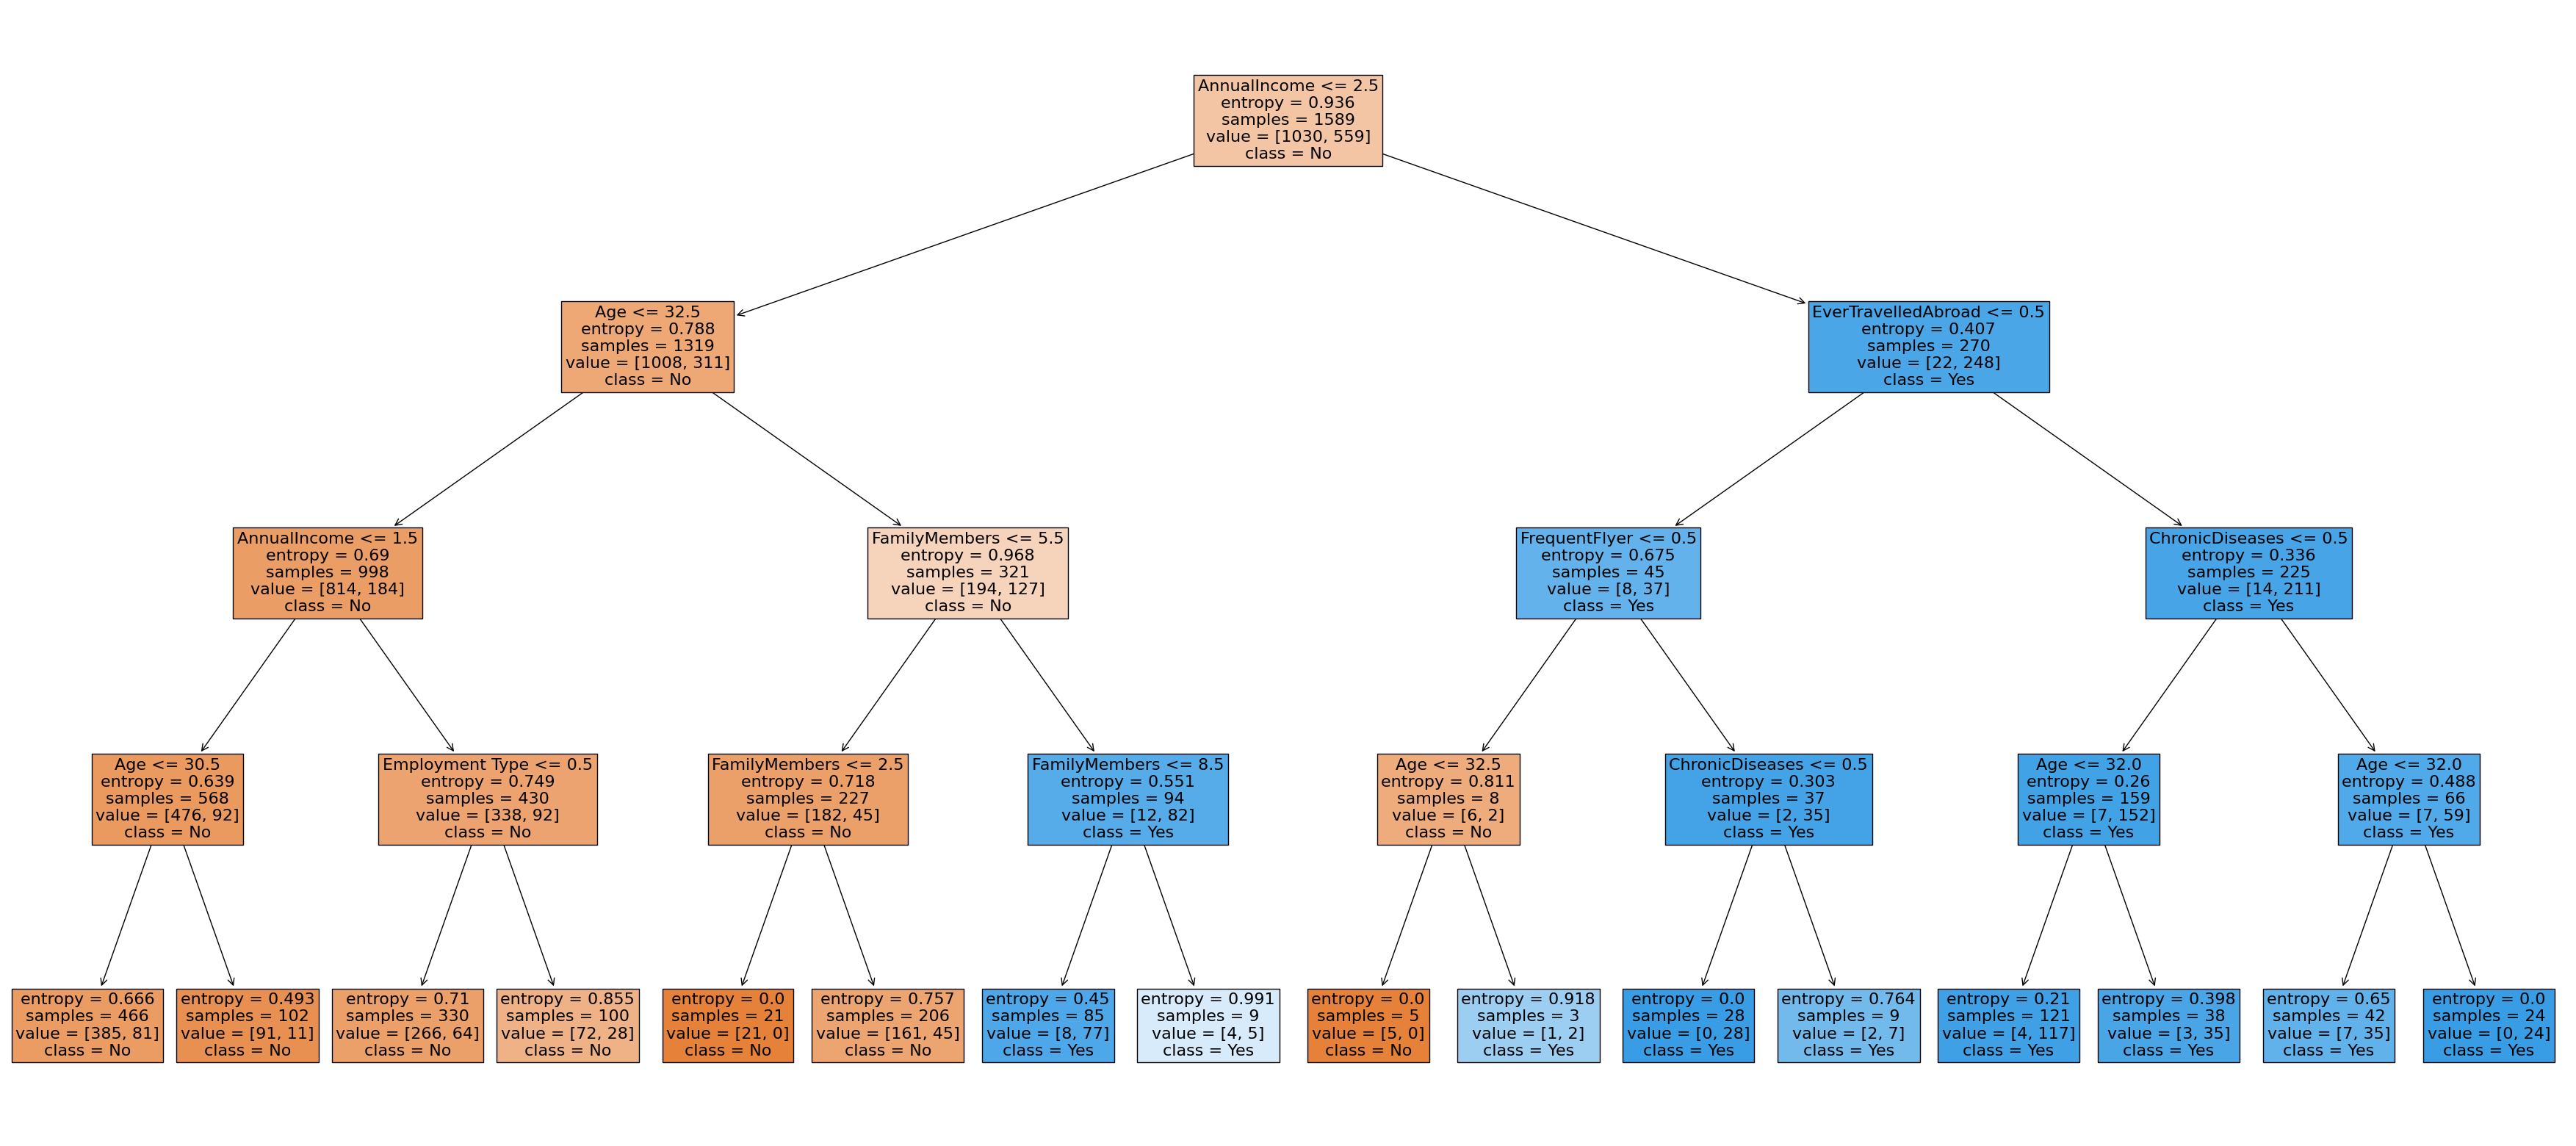

In [33]:
fig = plt.figure(figsize= (45,20))
_ = tree.plot_tree(model, feature_names= ind_col,
                   class_names = ['No','Yes'],
                   filled = True,fontsize=16)

# save model (CSV)

In [34]:
df.to_csv('DTree_TravelInsurance.csv',index=False)